# Car Insurance Claim prediction - Advanced Modeling

### Try out Basic model without Hyper parameter tuning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


In [2]:
data = pd.read_csv('pls_df.csv')

In [3]:
data.shape


(58592, 46)

In [4]:
#feature set
X = data.drop('is_claim',axis = 1)

In [5]:
X.shape

(58592, 45)

In [6]:
#response
y = data['is_claim']

In [7]:
y.shape

(58592,)

In [8]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Imbalanced data set

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score


# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Initialize a dictionary to store results
results = {}

# Fit each classifier and compute evaluation metrics
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    train_f2 = fbeta_score(y_train, y_train_pred, beta=2)
    test_f2 = fbeta_score(y_test, y_test_pred, beta=2)

    results[clf_name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1-Score': train_f1,
        'Test F1-Score': test_f1,
        'Train F2-Score': train_f2,
        'Test F2-Score': test_f2
    }

# Create a table for evaluation metrics
metrics_table = pd.DataFrame(results).T

print("Evaluation Metrics (Training and Test Data):")
print(metrics_table)


C:\Users\Aravinda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aravinda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aravinda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. 

Evaluation Metrics (Training and Test Data):
                     Train Accuracy  Test Accuracy  Train Precision  \
Logistic Regression        0.936168       0.935489         0.000000   
Naive Bayes                0.896358       0.899650         0.073193   
K-Nearest Neighbors        0.936979       0.932503         0.620253   
Random Forest              0.999893       0.931137         1.000000   
XGBoost                    0.937448       0.935319         1.000000   

                     Test Precision  Train Recall  Test Recall  \
Logistic Regression        0.000000      0.000000     0.000000   
Naive Bayes                0.073171      0.053476     0.047619   
K-Nearest Neighbors        0.111111      0.032754     0.006614   
Random Forest              0.067797      0.998329     0.005291   
XGBoost                    0.000000      0.020053     0.000000   

                     Train F1-Score  Test F1-Score  Train F2-Score  \
Logistic Regression        0.000000       0.000000        0.0

### 2. Balancing with SMOTE

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Initialize a dictionary to store results
results = {}

# Fit each classifier and compute evaluation metrics
for clf_name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_train_pred = clf.predict(X_train_resampled)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train_resampled, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train_resampled, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    train_f2 = fbeta_score(y_train_resampled, y_train_pred, beta=2)
    test_f2 = fbeta_score(y_test, y_test_pred, beta=2)

    results[clf_name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1-Score': train_f1,
        'Test F1-Score': test_f1,
        'Train F2-Score': train_f2,
        'Test F2-Score': test_f2
    }

# Create a table for evaluation metrics
metrics_table = pd.DataFrame(results).T

print("Evaluation Metrics (Training and Test Data):")
print(metrics_table)

C:\Users\Aravinda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation Metrics (Training and Test Data):
                     Train Accuracy  Test Accuracy  Train Precision  \
Logistic Regression        0.585504       0.572574         0.582176   
Naive Bayes                0.536269       0.401485         0.527603   
K-Nearest Neighbors        0.894294       0.709788         0.838445   
Random Forest              0.999989       0.898114         0.999977   
XGBoost                    0.962706       0.932844         0.998160   

                     Test Precision  Train Recall  Test Recall  \
Logistic Regression        0.081974      0.605752     0.551587   
Naive Bayes                0.069601      0.693239     0.669312   
K-Nearest Neighbors        0.080824      0.976801     0.337302   
Random Forest              0.103261      1.000000     0.075397   
XGBoost                    0.121951      0.927121     0.006614   

                     Train F1-Score  Test F1-Score  Train F2-Score  \
Logistic Regression        0.593730       0.142735        0.6

### 2. Balancing with OverSampling

In [11]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampling to balance the training set
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Initialize a dictionary to store results
results = {}

# Fit each classifier and compute evaluation metrics
for clf_name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_train_pred = clf.predict(X_train_resampled)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train_resampled, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train_resampled, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    train_f2 = fbeta_score(y_train_resampled, y_train_pred, beta=2)
    test_f2 = fbeta_score(y_test, y_test_pred, beta=2)

    results[clf_name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1-Score': train_f1,
        'Test F1-Score': test_f1,
        'Train F2-Score': train_f2,
        'Test F2-Score': test_f2
    }

# Create a table for evaluation metrics
metrics_table = pd.DataFrame(results).T

print("Evaluation Metrics (Training and Test Data):")
print(metrics_table)



C:\Users\Aravinda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation Metrics (Training and Test Data):
                     Train Accuracy  Test Accuracy  Train Precision  \
Logistic Regression        0.578622       0.566857         0.575515   
Naive Bayes                0.525945       0.364622         0.518909   
K-Nearest Neighbors        0.941056       0.785391         0.894545   
Random Forest              0.999989       0.920300         0.999977   
XGBoost                    0.810613       0.696134         0.770823   

                     Test Precision  Train Recall  Test Recall  \
Logistic Regression        0.082689      0.599189     0.566138   
Naive Bayes                0.068943      0.711994     0.707672   
K-Nearest Neighbors        0.080591      1.000000     0.223545   
Random Forest              0.087963      1.000000     0.025132   
XGBoost                    0.100086      0.884073     0.464286   

                     Train F1-Score  Test F1-Score  Train F2-Score  \
Logistic Regression        0.587114       0.144302        0.5

### 3.Balancing With UnderSampling

In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling to the training set
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Initialize a dictionary to store results
results = {}

# Fit each classifier and compute evaluation metrics
for clf_name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_train_pred = clf.predict(X_train_resampled)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train_resampled, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train_resampled, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    train_f2 = fbeta_score(y_train_resampled, y_train_pred, beta=2)
    test_f2 = fbeta_score(y_test, y_test_pred, beta=2)

    results[clf_name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1-Score': train_f1,
        'Test F1-Score': test_f1,
        'Train F2-Score': train_f2,
        'Test F2-Score': test_f2
    }

# Create a table for evaluation metrics
metrics_table = pd.DataFrame(results).T

print("Evaluation Metrics (Training and Test Data with Random Undersampling):")
print(metrics_table)



C:\Users\Aravinda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation Metrics (Training and Test Data with Random Undersampling):
                     Train Accuracy  Test Accuracy  Train Precision  \
Logistic Regression        0.577874       0.556105         0.574441   
Naive Bayes                0.535261       0.420599         0.528599   
K-Nearest Neighbors        0.709726       0.531018         0.704198   
Random Forest              1.000000       0.578462         1.000000   
XGBoost                    0.858122       0.556873         0.842004   

                     Test Precision  Train Recall  Test Recall  \
Logistic Regression        0.081040      0.600936     0.568783   
Naive Bayes                0.070839      0.651738     0.658730   
K-Nearest Neighbors        0.074201      0.723262     0.546296   
Random Forest              0.086070      1.000000     0.575397   
XGBoost                    0.083849      0.881684     0.591270   

                     Train F1-Score  Test F1-Score  Train F2-Score  \
Logistic Regression        0.587390

*  Now we selected Random forest with SMOTE balancing has some higher performance

### Cost sensitive learning to improve F1 score - weighted response

In [13]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest classifier with class weights
class_weights = {0: 1, 1: 1000}  # You can adjust the weight for each class as needed
rf_classifier = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Fit the model to your resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on both train and test data
y_train_pred = rf_classifier.predict(X_train_resampled)
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy, F1, and F2 scores for both train and test sets
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)
f2_train = fbeta_score(y_train_resampled, y_train_pred, beta=2)

accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)

# Create a table for the results
results_table = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'F2-Score'],
    'Train': [accuracy_train, f1_train, f2_train],
    'Test': [accuracy_test, f1_test, f2_test]
})

print("Results:")
print(results_table)


Results:
     Metric  Train      Test
0  Accuracy    1.0  0.909293
1  F1-Score    1.0  0.068361
2  F2-Score    1.0  0.057202


### Fit SVM -  Balanced dataset(SMOTE)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create an SVM classifier
svm_classifier = SVC()

# Fit the SVM model to the resampled training data
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on both train and test data
y_train_pred = svm_classifier.predict(X_train_resampled)
y_test_pred = svm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, F1, and F2 scores for training data
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
precision_train = precision_score(y_train_resampled, y_train_pred)
recall_train = recall_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)
f2_train = fbeta_score(y_train_resampled, y_train_pred, beta=2)

# Calculate accuracy, precision, recall, F1, and F2 scores for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)

# Create a table for the results
results_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'F2-Score'],
    'Training Data': [accuracy_train, precision_train, recall_train, f1_train, f2_train],
    'Test Data': [accuracy_test, precision_test, recall_test, f1_test, f2_test]
})

print("Results:")
print(results_table)


### Fit  models with hyper parameter tuning

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define hyperparameters for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    #'class_weight': [{0: 1, 1: 10}, {0: 1, 1: 15}]  # You can adjust class weights as needed
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator from the hyperparameter tuning
best_rf_classifier = grid_search.best_estimator_

# Make predictions on both train and test data
y_train_pred = best_rf_classifier.predict(X_train_resampled)
y_test_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, F1, and F2 scores for training data
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
precision_train = precision_score(y_train_resampled, y_train_pred)
recall_train = recall_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)
f2_train = fbeta_score(y_train_resampled, y_train_pred, beta=2)

# Calculate accuracy, precision, recall, F1, and F2 scores for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)

# Create a table for the results
results_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'F2-Score'],
    'Training Data': [accuracy_train, precision_train, recall_train, f1_train, f2_train],
    'Test Data': [accuracy_test, precision_test, recall_test, f1_test, f2_test]
})

print("Results:")
print(results_table)


### Get feature Importance from Random Forest model

Top 15 Features:
                          Feature  Importance
36                  policy_tenure    0.398709
38            age_of_policyholder    0.249942
37                     age_of_car    0.184341
0              population_density    0.139641
4                    gross_weight    0.002379
2                          length    0.002337
3                          height    0.002214
44          no_of_safety_measures    0.002069
1                           width    0.002059
42                 turning_radius    0.002023
28  engine_type_F8D Petrol Engine    0.001535
43                    ncap_rating    0.001343
35                     is_ecw_Yes    0.001103
41                     cylinder.1    0.000944
40                       cylinder    0.000786


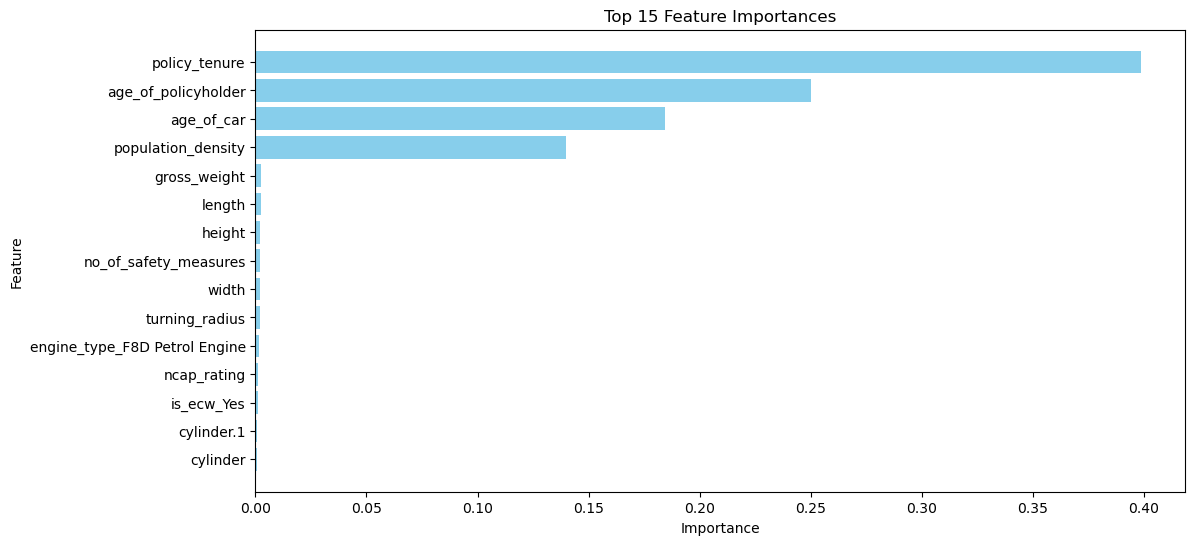

In [10]:
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest classifier with tuned hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=200,  # Your chosen value
    max_depth=None,    # Your chosen value
    min_samples_split=5,  # Your chosen value
    min_samples_leaf=10,   # Your chosen value
    #class_weight={0: 1, 1: 100},
    random_state=42
)

# Fit the model to your resampled training data
#rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 15 features and their importances as a table
top_15_features = feature_importance_df.head(15)
print("Top 15 Features:")
print(top_15_features)

# Create a bar graph to visualize the top 15 features
plt.figure(figsize=(12, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()


### Fit model again with 5 important  features (By RF feature Importance)

### 1. Random forest (Tuned)

In [13]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_5_features = feature_importance_df.head(5)

# Create new DataFrames with only the top 5 features
X_train_top5 = X_train_resampled[top_5_features['Feature']]
X_test_top5 = X_test[top_5_features['Feature']]

# Create a new Random Forest classifier with the top 5 features
rf_classifier_top5 = RandomForestClassifier(
    n_estimators=200,
    max_depth=None , 
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

# Fit the model to the training data with the top 5 features
rf_classifier_top5.fit(X_train_top5, y_train_resampled)

# Make predictions on both train and test data
y_train_pred_top5 = rf_classifier_top5.predict(X_train_top5)
y_test_pred_top5 = rf_classifier_top5.predict(X_test_top5)

# Calculate accuracy, precision, recall, F1, and F2 scores for training data with top 5 features
accuracy_train_top5 = accuracy_score(y_train_resampled, y_train_pred_top5)
precision_train_top5 = precision_score(y_train_resampled, y_train_pred_top5)
recall_train_top5 = recall_score(y_train_resampled, y_train_pred_top5)
f1_train_top5 = f1_score(y_train_resampled, y_train_pred_top5)
f2_train_top5 = fbeta_score(y_train_resampled, y_train_pred_top5, beta=2)

# Calculate accuracy, precision, recall, F1, and F2 scores for test data with top 5 features
accuracy_test_top5 = accuracy_score(y_test, y_test_pred_top5)
precision_test_top5 = precision_score(y_test, y_test_pred_top5)
recall_test_top5 = recall_score(y_test, y_test_pred_top5)
f1_test_top5 = f1_score(y_test, y_test_pred_top5)
f2_test_top5 = fbeta_score(y_test, y_test_pred_top5, beta=2)

# Create a table for the results with top 5 features
results_table_top5 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'F2-Score'],
    'Training Data': [accuracy_train_top5, precision_train_top5, recall_train_top5, f1_train_top5, f2_train_top5],
    'Test Data': [accuracy_test_top5, precision_test_top5, recall_test_top5, f1_test_top5, f2_test_top5]
})

print("Results with Top 5 Features:")
print(results_table_top5)

Results with Top 5 Features:
      Metric  Training Data  Test Data
0   Accuracy       0.970648   0.908866
1  Precision       0.989686   0.093750
2     Recall       0.951209   0.047619
3   F1-Score       0.970066   0.063158
4   F2-Score       0.958663   0.052817


### 2. Logistic(Tuned)

In [36]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_5_features = feature_importance_df.head(5)

# Create new DataFrames with only the top 5 features
X_train_top5 = X_train_resampled[top_5_features['Feature']]
X_test_top5 = X_test[top_5_features['Feature']]


# Create a Lasso Logistic Regression classifier
lasso_logistic = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

# Fit the model to the training data with the top 5 features
lasso_logistic.fit(X_train_top5, y_train_resampled)

# Make predictions on both train and test data
y_train_pred = lasso_logistic.predict(X_train_top5)
y_test_pred = lasso_logistic.predict(X_test_top5)

# Calculate accuracy, precision, recall, F1, and F2 scores for training data
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
precision_train = precision_score(y_train_resampled, y_train_pred)
recall_train = recall_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)
f2_train = fbeta_score(y_train_resampled, y_train_pred, beta=2)

# Calculate accuracy, precision, recall, F1, and F2 scores for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)

# Create a table for the results
results_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'F2-Score'],
    'Training Data': [accuracy_train, precision_train, recall_train, f1_train, f2_train],
    'Test Data': [accuracy_test, precision_test, recall_test, f1_test, f2_test]
})

print("Results with Lasso Logistic Regression and Top 5 Features:")
print(results_table)

Results with Lasso Logistic Regression and Top 5 Features:
      Metric  Training Data  Test Data
0   Accuracy       0.581265   0.567113
1  Precision       0.577779   0.081605
2     Recall       0.603678   0.556878
3   F1-Score       0.590445   0.142350
4   F2-Score       0.598314   0.257241


### 3. Naive Bayes

In [37]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fit the model to the training data with the top 5 features
naive_bayes_classifier.fit(X_train_top5, y_train_resampled)

# Make predictions on both train and test data
y_train_pred = naive_bayes_classifier.predict(X_train_top5)
y_test_pred = naive_bayes_classifier.predict(X_test_top5)

# Calculate accuracy, precision, recall, F1, and F2 scores for training data
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
precision_train = precision_score(y_train_resampled, y_train_pred)
recall_train = recall_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)
f2_train = fbeta_score(y_train_resampled, y_train_pred, beta=2)

# Calculate accuracy, precision, recall, F1, and F2 scores for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)

# Create a table for the results
results_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'F2-Score'],
    'Training Data': [accuracy_train, precision_train, recall_train, f1_train, f2_train],
    'Test Data': [accuracy_test, precision_test, recall_test, f1_test, f2_test]
})

print("Results with Gaussian Naive Bayes and Top 5 Features:")
print(results_table)

Results with Gaussian Naive Bayes and Top 5 Features:
      Metric  Training Data  Test Data
0   Accuracy       0.589834   0.528629
1  Precision       0.578557   0.080134
2     Recall       0.661608   0.601852
3   F1-Score       0.617302   0.141436
4   F2-Score       0.643143   0.261434


### 4.Xgboost model (Tuned)

In [40]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# Define a parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Perform Grid Search CV for hyperparameter tuning
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_top5, y_train_resampled)

# Get the best estimator from the grid search
best_xgb_classifier = grid_search.best_estimator_

# Fit the best model to the training data with the top 5 features
best_xgb_classifier.fit(X_train_top5, y_train_resampled)

# Make predictions on both train and test data
y_train_pred = best_xgb_classifier.predict(X_train_top5)
y_test_pred = best_xgb_classifier.predict(X_test_top5)

# Calculate accuracy, precision, recall, F1, and F2 scores for training data
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
precision_train = precision_score(y_train_resampled, y_train_pred)
recall_train = recall_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)
f2_train = fbeta_score(y_train_resampled, y_train_pred, beta=2)

# Calculate accuracy, precision, recall, F1, and F2 scores for test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
f2_test = fbeta_score(y_test, y_test_pred, beta=2)

# Create a table for the results
results_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'F2-Score'],
    'Training Data': [accuracy_train, precision_train, recall_train, f1_train, f2_train],
    'Test Data': [accuracy_test, precision_test, recall_test, f1_test, f2_test]
})

print("Results with Tuned XGBoost and Top 5 Features:")
print(results_table)
 





Results with Tuned XGBoost and Top 5 Features:
      Metric  Training Data  Test Data
0   Accuracy       0.964130   0.934209
1  Precision       0.999387   0.105263
2     Recall       0.928830   0.002646
3   F1-Score       0.962818   0.005161
4   F2-Score       0.942133   0.003286


In [41]:
print(best_xgb_classifier)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


### Ensemble modeling (XGB, Logistic, RF)

In [61]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# Define tuned parameters for each classifier
rf_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'class_weight': 'balanced',
    #'class_weight': {0: 1, 1: 20},
    'random_state': 42
}

xgb_params = {
    'n_estimators': 200,
    'max_depth': 4,
    'learning_rate': 0.1,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    #'scale_pos_weight': 20,
    'random_state': 42
}


# Create classifiers with tuned parameters
rf_classifier = RandomForestClassifier(**rf_params)
xgb_classifier = XGBClassifier(**xgb_params)
#logistic_classifier = LogisticRegression(**logistic_params)

# Create an ensemble model using hard voting
ensemble_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('xgb', xgb_classifier),
        #('logistic', logistic_classifier)
    ],
    voting='hard'
)

# Fit the ensemble model to the training data with the top 5 features
ensemble_classifier.fit(X_train_top5, y_train_resampled)

# Make predictions on both train and test data with the ensemble model
y_train_pred_ensemble = ensemble_classifier.predict(X_train_top5)
y_test_pred_ensemble = ensemble_classifier.predict(X_test_top5)

# Calculate accuracy, precision, recall, F1, and F2 scores for training data
accuracy_train_ensemble = accuracy_score(y_train_resampled, y_train_pred_ensemble)
precision_train_ensemble = precision_score(y_train_resampled, y_train_pred_ensemble)
recall_train_ensemble = recall_score(y_train_resampled, y_train_pred_ensemble)
f1_train_ensemble = f1_score(y_train_resampled, y_train_pred_ensemble)
f2_train_ensemble = fbeta_score(y_train_resampled, y_train_pred_ensemble, beta=2)

# Calculate accuracy, precision, recall, F1, and F2 scores for test data
accuracy_test_ensemble = accuracy_score(y_test, y_test_pred_ensemble)
precision_test_ensemble = precision_score(y_test, y_test_pred_ensemble)
recall_test_ensemble = recall_score(y_test, y_test_pred_ensemble)
f1_test_ensemble = f1_score(y_test, y_test_pred_ensemble)
f2_test_ensemble = fbeta_score(y_test, y_test_pred_ensemble, beta=2)

# Create a table for the results
results_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'F2-Score'],
    'Training Data': [accuracy_train_ensemble, precision_train_ensemble, recall_train_ensemble, f1_train_ensemble, f2_train_ensemble],
    'Test Data': [accuracy_test_ensemble, precision_test_ensemble, recall_test_ensemble, f1_test_ensemble, f2_test_ensemble]
})

print("Results with Ensemble Model (Hard Voting):")
print(results_table)


Results with Ensemble Model (Hard Voting):
      Metric  Training Data  Test Data
0   Accuracy       0.890864   0.920130
1  Precision       0.979588   0.137097
2     Recall       0.798364   0.044974
3   F1-Score       0.879740   0.067729
4   F2-Score       0.829038   0.051956


In [64]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# Define tuned parameters for each classifier
rf_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'class_weight': 'balanced',
    #'class_weight': {0: 1, 1: 20},
    'random_state': 42
}

xgb_params = {
    'n_estimators': 200,
    'max_depth': 4,
    'learning_rate': 0.1,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    #'scale_pos_weight': 20,
    'random_state': 42
}


# Create classifiers with tuned parameters
rf_classifier = RandomForestClassifier(**rf_params)
xgb_classifier = XGBClassifier(**xgb_params)
#logistic_classifier = LogisticRegression(**logistic_params)

# Create an ensemble model using hard voting
ensemble_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('xgb', xgb_classifier),
        #('logistic', logistic_classifier)
    ],
    voting='soft'
)

# Fit the ensemble model to the training data with the top 5 features
ensemble_classifier.fit(X_train_top5, y_train_resampled)

# Make predictions on both train and test data with the ensemble model
y_train_pred_ensemble = ensemble_classifier.predict(X_train_top5)
y_test_pred_ensemble = ensemble_classifier.predict(X_test_top5)

# Calculate accuracy, precision, recall, F1, and F2 scores for training data
accuracy_train_ensemble = accuracy_score(y_train_resampled, y_train_pred_ensemble)
precision_train_ensemble = precision_score(y_train_resampled, y_train_pred_ensemble)
recall_train_ensemble = recall_score(y_train_resampled, y_train_pred_ensemble)
f1_train_ensemble = f1_score(y_train_resampled, y_train_pred_ensemble)
f2_train_ensemble = fbeta_score(y_train_resampled, y_train_pred_ensemble, beta=2)

# Calculate accuracy, precision, recall, F1, and F2 scores for test data
accuracy_test_ensemble = accuracy_score(y_test, y_test_pred_ensemble)
precision_test_ensemble = precision_score(y_test, y_test_pred_ensemble)
recall_test_ensemble = recall_score(y_test, y_test_pred_ensemble)
f1_test_ensemble = f1_score(y_test, y_test_pred_ensemble)
f2_test_ensemble = fbeta_score(y_test, y_test_pred_ensemble, beta=2)

# Create a table for the results
results_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'F2-Score'],
    'Training Data': [accuracy_train_ensemble, precision_train_ensemble, recall_train_ensemble, f1_train_ensemble, f2_train_ensemble],
    'Test Data': [accuracy_test_ensemble, precision_test_ensemble, recall_test_ensemble, f1_test_ensemble, f2_test_ensemble]
})

print("Results with Ensemble Model (soft Voting):")
print(results_table)


Results with Ensemble Model (soft Voting):
      Metric  Training Data  Test Data
0   Accuracy       0.930938   0.912706
1  Precision       0.970749   0.140162
2     Recall       0.888653   0.068783
3   F1-Score       0.927889   0.092280
4   F2-Score       0.903943   0.076583


### PDP for random forest model with only five variable mode

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp, info_plots
import matplotlib.pyplot as plt

# Load your original dataset
# Assuming you have a DataFrame named 'data' with features and labels (X and y)

# Fit a Random Forest model (you can use your tuned model)
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_classifier.fit(X_train_top5, y_train_resampled)

# Choose the feature for which you want to create the PDP
# Replace 'feature_name' with the actual name of the feature you want to plot
feature_name = 'your_feature_name_here'

# Calculate the PDP for the chosen feature
pdp_feature = pdp.pdp_isolate(model=rf_classifier, dataset=X_test_top5, model_features=X_test_top5.columns, feature=feature_name)

# Create the PDP plot
pdp.pdp_plot(pdp_feature, feature_name)
plt.xlabel(feature_name)
plt.ylabel("Partial Dependence")
plt.title(f'Partial Dependence Plot for {feature_name}')
plt.show()


AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

In [15]:
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
import matplotlib.pyplot as plt


In [25]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
#my_model = GradientBoostingRegressor()
# fit the model as usual
#my_model.fit(X, y)
# Here we make the plot
my_plots = plot_partial_dependence(rf_classifier_top5,       
                                   features=[0,1,2,3,4], # column numbers of plots we want to show
                                   X=X_train_top5,            # raw predictors data.
                                   feature_names=['policy_tenure', 'age_of_policyholder', 'age_of_car','population_density'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

ModuleNotFoundError: No module named 'sklearn.ensemble.partial_dependence'

  Feature  Importance
36                  policy_tenure    0.398709
38            age_of_policyholder    0.249942
37                     age_of_car    0.184341
0              population_density    0.139641
4                    gross_weight    0.002379
2                          length    0.002337
3                          height    0.002214
44          no_of_safety_measures    0.002069
1                           width    0.002059
42                 turning_radius    0.002023
28  engine_type_F8D Petrol Engine    0.001535
43                    ncap_rating    0.001343
35                     is_ecw_Yes    0.001103
41                     cylinder.1    0.000944
40                       cylinder    0.000786